In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Globale Konstanten in einfachen Einheiten
G = 1
M = 1

# Newtonsches Gravitationsgesetz

Wir betrachten Gravitation in drei Raumdimensionen, die Bewegung soll aber jeweils in der $x$-$y$-Ebene stattfinden. Aufgrund der Rotationssymmetrie des Gravitationsfeldes können wir uns dann auf die Behandlung dieser zwei Koordinaten beschränken. Die Kraft, die von Objeit 2 auf Objekt 1 ausgeübt wird, lässt sich beschreiben durch

$$
F_{21}(r) = -G \frac{M}{|r|^2}\hat{r}_{12}\, ,
$$

wobei $M$ die kombinierte Masse $M=m_1m_2$ ist. Die Gravitationskraft ist konservativ mit Potential

$$
V(r) = -G \frac{M}{|r|}\, .
$$

In [6]:
# assuming fixed object at r = 0
def gravity(r):
    r = np.atleast_2d(r)
    rr = r[...,0]**2 + r[...,1]**2 # r² 
    
    # Task: Hier das Gravitationsgesetz einfügen
    f_abs = -G*M/rr

    # computing the relevant components 
    theta = np.arcsin(r[...,0] / np.sqrt(rr))
    fx = np.array(np.sin(theta) * f_abs)
    fy = np.array(np.cos(theta) * f_abs * np.sign(r[...,1]))
    return fx,fy

In [22]:
def potential(r):
    r = np.atleast_2d(r)
    rr = r[...,0]**2 + r[...,1]**2
    
    # Task: Hier das Gravitationspotential einfügen
    V = -G * M / np.sqrt(rr)
    
    return V

## Plot des Vektorfeldes

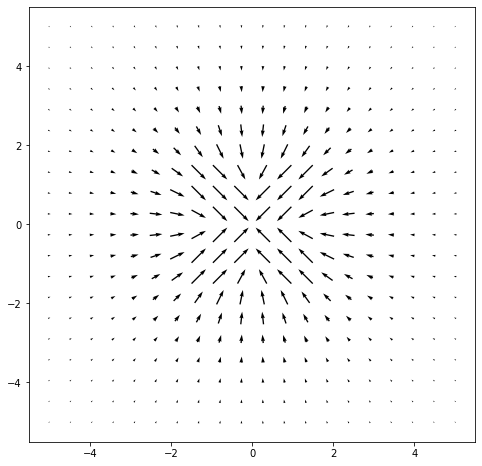

In [23]:
# Plot des Kraft - Vektorfeldes
# Wenn alles funktioniert hat, sollte hier ein Plot des VF erstellt werden
boundaries = 5

# Erzeuge ein Gitter und bestimme zugehörige Kräfte
space = np.linspace(-boundaries,boundaries,20)
X, Y = np.meshgrid(space, space)
pts = np.stack([X,Y],axis = 2)
pts = pts.reshape((pts.shape[0] * pts.shape[1],pts.shape[2]))
FX,FY = gravity(pts)

# Für die Darstellung wird die maximale Länge der Pfeile festgelegt
# Längere Vektoren zerstören die Darstellung
max_comp = 0.2
FX = np.clip(FX,-max_comp,max_comp)
FY = np.clip(FY,-max_comp,max_comp)

# Plot
fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(X, Y, FX, FY,scale=1, scale_units='inches',pivot = 'mid')

plt.show()

# Integration entlang eines Weges

## Geschlossener Weg

Wähle einen Integrationsweg entlag des Pfades

$$
\gamma(t) = (r_1\cos(2\pi t) + x_0,r_2\sin(2\pi t) + y_0)\, .
$$

Für die Bestimmung der Arbeit wird noch die Ableitung benötigt, diese ist durch

$$
\gamma'(t) = (-r_12\pi\sin(\omega_1\pi t),r_22\pi\cos(\omega_2\pi t))
$$

gegeben.

In [24]:
# Task: Wähle geeignete Parameter um die geforderten Kurven zu erstellen!
r1 = 5
r2 = 7
xoff = 1
yoff = -3

In [25]:
# Diskretisierter Pfad, bzw Ableitungen
steps = 10000
times = np.linspace(0,1,steps)
gamma = np.empty((steps,2))
gamma_dt = np.empty((steps,2))
gamma[...,0] = r1 * np.cos(2*np.pi * times) + xoff
gamma[...,1] = r2 * np.sin(2*np.pi * times) + yoff
gamma_dt[...,0] = - r1 * 2 * np.pi * np.sin(2*np.pi * times)
gamma_dt[...,1] =   r2 * 2 * np.pi * np.cos(2*np.pi * times) 

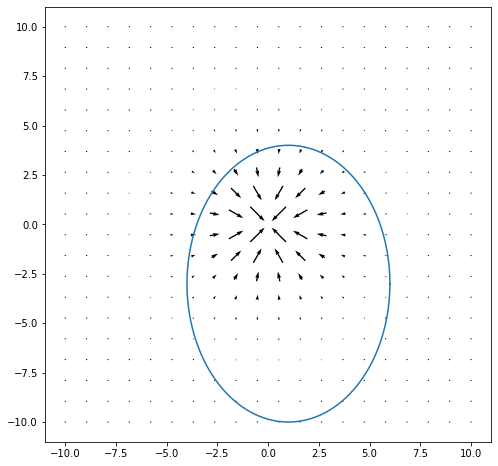

In [26]:
# Visualisation of the force field
boundaries = abs(gamma).max()

# create mesh and corresponding forces
space = np.linspace(-boundaries,boundaries,20)
X, Y = np.meshgrid(space, space)
pts = np.stack([X,Y],axis = 2)
pts = pts.reshape((pts.shape[0] * pts.shape[1],pts.shape[2]))
FX,FY = gravity(pts)

# Für die Darstellung wird die maximale Länge der Pfeile festgelegt
max_comp = 0.2
FX = np.clip(FX,-max_comp,max_comp)
FY = np.clip(FY,-max_comp,max_comp)

# Plot
fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(X, Y, FX, FY,scale=1, scale_units='inches',pivot = 'mid')


plt.plot(gamma[...,0], gamma[...,1])

plt.show()

### Integration mithilfe der Trapezregel

Die numerische Integration wird mithilfe der sogenannten Trapezregel durchgeführt

$$
I = \int_a^b f(x)\ \text{d}x \approx \frac{b-a}{2}\left(f(a)+f(b)\right)\, .
$$

Die numerische Integration gibt eine Approximation des tatsächlichen Integrales; hier durch die Integration einer linearen Interpolation der Funktion.

Für mehr Informationen siehe z.B. https://de.wikipedia.org/wiki/Trapezregel

In [27]:
# Ausführen der numerischen Integration
# Werte != 0 aber nah bei null können durch numerische Fehler verursacht werden
fx,fy = gravity(gamma)
F = fx * gamma_dt[...,0] + fy * gamma_dt[...,1]
I = (F[:-1] + F[1:])/2*1/steps
print(I.sum())

1.0408340855860843e-16


In [28]:
# Für konservative Kräfte lässt sich das Integral mit der Potentialdifferenz 
# an Start- und Endpunkt vergleichen
x_start = gamma[0]
x_final = gamma[-1]
W_theoretical = potential(x_start) - potential(x_final)
print(W_theoretical[0])

-2.7755575615628914e-17


## Gerade Linie
Als 'Sanity Check' können Sie hier die Integration entlang einer geraden Linie durchführen, die sie von einem Startpunkt A Ihrer Wahl zu einem beliebigen Endpunkt B Ihrer Wahl bringt. 

Erwarten Sie, dass die Arbeit entlang einer solchen Linie endlich ist, oder ist sie null? Entscheiden Sie, ob das erhaltene numerische Ergebnis qualitativ sinnvoll ist. 

In [29]:
# Diskretisierter Pfad, bzw Ableitungen
steps = 10000
times = np.linspace(0,1,steps)
gamma = np.empty((steps,2))
gamma_dt = np.empty((steps,2))

# Task: Fülle gamma nun mit einem geraden, nicht geschlossenen Pfad
# Hint: Es kann einfach "gerechnet" werden, Orientierung liefert der obere
#       geschlossene Pfad
gamma[...,0] = 2 * times + 1
gamma[...,1] = times + 0.3
gamma_dt[...,0] = 2
gamma_dt[...,1] = 1

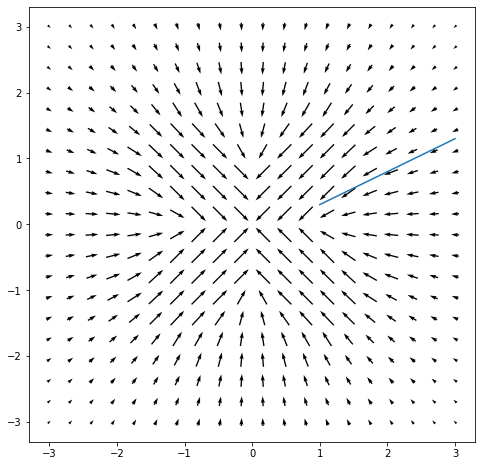

In [30]:
# Visualisation of the force field
boundaries = abs(gamma).max()

# create mesh and corresponding forces
space = np.linspace(-boundaries,boundaries,20)
X, Y = np.meshgrid(space, space)
pts = np.stack([X,Y],axis = 2)
pts = pts.reshape((pts.shape[0] * pts.shape[1],pts.shape[2]))
FX,FY = gravity(pts)

# Für die Darstellung wird die maximale Länge der Pfeile festgelegt
max_comp = 0.2
FX = np.clip(FX,-max_comp,max_comp)
FY = np.clip(FY,-max_comp,max_comp)

# Plot
fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(X, Y, FX, FY,scale=1, scale_units='inches',pivot = 'mid')
#
# Task: hier den Achsenplot einfügen 
# Hint: die x-Komponente ist mit gamma[...,0], die y-Komponente mit gamma[...,1] zu erhalten
# Hint: Wenn es oben geklappt hat, ist das hier copy-paste
#
plt.plot(gamma[...,0], gamma[...,1])
plt.show()

In [31]:
# Ausführen der numerischen Integration
# Kleine Werte 
fx,fy = gravity(gamma)
F = fx * gamma_dt[...,0] + fy * gamma_dt[...,1]
I = (F[:-1] + F[1:])/2*1/steps
print(I.sum())

-0.651909219440511


In [32]:
# Für konservative Kräfte lässt sich das Integral mit der Potentialdifferenz 
# an Start- und Endpunkt vergleichen
x_start = gamma[0]
x_final = gamma[-1]
W_theoretical = potential(x_start) - potential(x_final)
print(W_theoretical[0])

-0.6519744101178433


# Fancy Gravity

In [33]:
ChAngEthEgrAviTanIonaLlAw = 0.420

def fancy_gravity(r):
    r = np.atleast_2d(r)
    rr = r[...,0]**2 + r[...,1]**2
    
    # Task: an dieser Stelle kann man entweder das Gravitationsgesetz von oben eingeben, 
    #oder ein modifiziertes Gravitationsgesetz wählen:
    f_abs = -G * M / rr # Betrag der Kraft, z.B. eine Fkt. des Abstandes zum Ort des Schwerpunkts des Himmelskörpers
    
    theta = np.arcsin(r[...,0] / np.sqrt(rr))
    
    # Alternative bzw. Zusatzoption zur Modifikation des Gravitationsgesetzes:
    # Hier werden die Kräfte Komponentenweise bestimmt
    # Task: Verändere die Gravitationskraft von oben
    #       'x' ist durch r[...,1]
    #       'y' ist durch r[...,0]
    #        zu erhalten
    # (kann auch auskommentiert werden, wenn Sie nur mit der obigen Modifikation von f_abs arbeiten wollen)
    fx = np.array(np.sin(theta) * f_abs) + np.pi * r[...,1] + ChAngEthEgrAviTanIonaLlAw
    fy = np.array(np.cos(theta) * f_abs * np.sign(r[...,1])) * 3 * r[...,0] + ChAngEthEgrAviTanIonaLlAw

    return fx,fy

In [34]:
# Diskretisierter Pfad, bzw Ableitungen
r1 = 3
r2 = 2
xoff = 1
yoff = -2
# Die Parameter werden noch von oben übernommen, bei Bedarf, kann einfach die Zelle von oben kopiert
# werden um neue Parameter einzufügen
steps = 10000
times = np.linspace(0,1,steps)
gamma = np.empty((steps,2))
gamma_dt = np.empty((steps,2))
gamma[...,0] = r1 * np.cos(2*np.pi * times) + xoff
gamma[...,1] = r2 * np.sin(2*np.pi * times) + yoff
gamma_dt[...,0] = - r1 * 2 * np.pi * np.sin(2*np.pi * times)
gamma_dt[...,1] =   r2 * 2 * np.pi * np.cos(2*np.pi * times) 

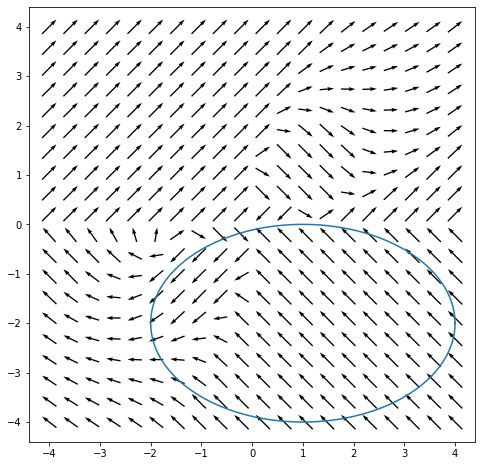

In [35]:
# Visualisation of the force field
boundaries = abs(gamma).max()

# create mesh and corresponding forces
space = np.linspace(-boundaries,boundaries,20)
X, Y = np.meshgrid(space, space)
pts = np.stack([X,Y],axis = 2)
pts = pts.reshape((pts.shape[0] * pts.shape[1],pts.shape[2]))
FX,FY = fancy_gravity(pts)

# Für die Darstellung wird die maximale Länge der Pfeile festgelegt
max_comp = 0.2
FX = np.clip(FX,-max_comp,max_comp)
FY = np.clip(FY,-max_comp,max_comp)

# Plot
fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(X, Y, FX, FY,scale=1, scale_units='inches',pivot = 'mid')
#
# Task: hier den Achsenplot einfügen 
# Hint: die x-Komponente ist mit gamma[...,0], die y-Komponente mit gamma[...,1] zu erhalten
# Hint: Wenn es oben geklappt hat, ist das hier copy-paste
#
plt.plot(gamma[...,0], gamma[...,1])
plt.show()

In [36]:
# Integration des neuen Integrationsgesetzes, ist es konservtaiv?
fx,fy = fancy_gravity(gamma)
F = fx * gamma_dt[...,0] + fy * gamma_dt[...,1]
I = (F[:-1] + F[1:])/2*1/steps
print(I.sum())


print("Nicht konservativ!")

-51.49228448908073
Nicht konservativ!
